# 🦉COSADAMA Introduction to Data Science Study

- 일자: 2020-06-01
- 작성자: 박하람 
- 참고자료: 파이썬으로 데이터 주무르기(민형기)
- 교재: 235 - 264쪽 (깃헙 교안으로 공부하면서, 궁금한 부분은 교재를 참고하세요. 혹은 깃헙 교안을 다 보고 교재를 복습 겸 읽어봐도 됩니다!)

## 8. 19대 대선 결과 분석 

이번 프로젝트 **19대 대선 결과 분석**에서는 무지 재미있는 작업을 해볼겁니다! 투표율로 대한민국 지도 시각화를 해볼 것인데요😍(소리 질러!) 현 문재인 대통령을 만들었던 19대 대통령 투표율을 시각화해 볼 것이에요. 19대 대선에서는 민주당 문재인, 자한당 홍준표, 국민당 안철수가 유력 후보였는데요! 이 세 후보를 지역별로 시각화해보고, 문재인 vs. 홍준표 / 홍준표 vs. 안철수 / 문재인 vs. 안철수까지 비교해서 시각화해볼 것입니다. 완전 신나죠잉? 

이번에는 지난 시간에 사용한 Selenium과 BeautifulSoup을 다시 사용해서 웹크롤링 해올 것이구요, 혜식님의 코드를 일부 가져와 대한민국 지도를 시각화했던 것이 기억나시죠? 이번 프로젝트에서는 다시 사용해서 시각화해보려고 합니다🥰 마찬가지로 복습이 되겠지요🐶

✘ 주의할 점 ✘
- 교재 235 - 248쪽은 선거관리 위원회 홈페이지가 재보궐선거로 구성화면이 변경되었기 때문에 활용할 수 없습니다...😢 
- 교재는 6-3부터 다시 참고할 수 있습니다! 6-1과 6-2절은 요 깃헙을 참고해주시길 바라요! 

### 8.1 Selinium과 Beautiful Soup을 이용한 데이터 획득 준비 작업 

우선 필요한 모듈들을 모두 import해줍시다.

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

Selenium을 사용해서 웹크롤링 할 것이기 때문에 Selenium도 import 해주고요.

In [2]:
from selenium import webdriver
import time

그 다음부터는 이전에 했을 때 고대로 적용하면 됩니다. 공식이니 뭐 이해할 필요 없이 웹드라이버 위치 찾아서 넣고! 홈페이지 찾아서 넣으면 되겠죵? 

- [중앙선거관리위원회 선거통계시스템](http://info.nec.go.kr/main/showDocument.xhtml?electionId=0000000000&topMenuId=VC&secondMenuId=VCCP09): 요 사이트에서 대통령선거, 국회의원선거, 지방선거까지 모두 확인할 수 있습니다 :) 

In [3]:
# 본인의 웹드라이버 위치 넣으세요! 
driver = webdriver.Chrome('/Users/harampark/Documents/chromedriver')
# 원하는 홈페이지로 슝~
driver.get("http://info.nec.go.kr/main/showDocument.xhtml?electionId=0000000000&topMenuId=VC&secondMenuId=VCCP09")

![대통령 선거](images/1.png)

우리가 원하는 것은 대통령 선거니 대통령 선거를 클릭해줘야겠죠? ID를 활용하여 클릭을 명령하라고 할 것이기 때문에 개발자도구로 해당 부분의 ID를 확인합니다! 

In [4]:
driver.find_element_by_id("electionType1").click()

- elem.send_keys('원하는 키 선택')

메서드 체인으로 연결해서 제19대와 대통령 선거를 클릭할 겁니다! 

In [5]:
# 해당 부분의 ID 찾고 제19대 누르라고 명령! 
driver.find_element_by_id("electionName").send_keys("제19대")

In [6]:
# 해당 부분의 ID 찾고 대통령 선거 누르라고 명령!
driver.find_element_by_class("electionCode").send_keys("대통령선거")

![대통령 선거](images/2.png)

여기까지 오셨다면 잘하셨습니다. 그 다음에 '시도' 파트에서는 광역시와 시도 이름들까지 가져와서 리스트를 만들어주려고 해요. 그래서 '시도'의 xpath을 복사해 준 후, option이라는 태그를 클릭해 텍스트만 가져오려고 합니다! 

In [7]:
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name("option") # 옵션이라는 태그 이름! 
sido_names_values = [option.text for option in sido_list] # 옵션의 텍스트만!
sido_names_values

['▽ 선 택',
 '▷ 전 체',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [8]:
# 선택, 전체 없애고 나머지만 가져오자!
sido_names_values = sido_names_values[2:]
sido_names_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

이렇게 시도 리스트들을 다 잘 가져왔네요! 이후에 사용되니까 이를 변수에 잘 저장해 놨구요. 본격적으로 데이터를 가져와봅시다. 

### 8.2 19대 대선 개표 결과 데이터 획득하기 

이번 장에서는 여러분들이 활용을 어려워하시는 함수 사용을 많이 해볼 거에요. 함수는 편리한데요, 반복적으로 수행해야 하는 것들이 있을 때 함수를 활용하면 코드 길이를 확 줄일 수 있거든요. 코드가 더 이뻐지는거죠. 그래서 지난 시간에 배웠던 파이썬 정규표현식 모듈 re를 활용하여 잘 가공해보도록 합시다! 

우선 re를 import해주고, **get_num**이라는 함수를 만들어줬어요. 

In [9]:
import re

def get_num(tmp):
    return float(re.split('\(', tmp)[0].replace(',',''))

![함수](images/3.png)

후에 웹크롤링으로 이 데이터를 가져오게 될 경우, ( )를 제외한 앞의 득표수만 가져오고 싶어서 만든 함수에요! re.split으로 '(' 이전으로 나눈후, 첫번째 항목=왼쪽 숫자만 얻어서, replace로 콤마를 제거하고 float 형으로 바꿔주는 함수에요. 이렇게 말하면 감이 안오실 수 있어서 하나 예시를 들어볼게요.

In [10]:
data = '24,395(412.3)'
get_num(data)

24395.0

이제 조금 이해가 가시죠? 

그 다음에는 **move_sido**라는 함수를 만들어 줄 것이에요. 이 함수는 광역시도 이름을 리스트에 전송하고 검색 버튼을 누르는 역할을 해요. 

In [11]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

wait = WebDriverWait(driver, 10) # 10초 기다려주세요! 

def move_sido(name):
    element = driver.find_element_by_id("cityCode") 
    element.send_keys(name)
    make_xpath = """//*[@id="searchBtn"]"""   # 검색 버튼의 xpath 
    wait.until(EC.element_to_be_clickable((By.XPATH,make_xpath)))  # 검색 버튼이 생길 때까지 기다리기! 
    driver.find_element_by_xpath(make_xpath).click() # 검색 버튼 클릭 

시도 리스트에서 원하는 시도를 검색할 때 누를 곳의 id를 먼저 찾아주고요,("cityCode") 그 다음에는 앞서 뽑아낸 광역시도 리스트를 이름에 넣어주어 클릭하도록 할 것이에요. 아래 사진과 같이요! 
![함수](images/4.png)

그 다음에는 누른 후에 '검색'이라는 버튼이 나오게 되는데, 바로 나오지 않기 때문에 시간 간격을 주는 거랍니다. 검색 버튼의 xpath를 카피해 클릭하도록 하면 데이터 결과가 나오겠죠. 
![함수](images/5.png)

그 다음에는 **append_data**라는 함수를 만들 것인데요, 빈 내용으로 미리 준비한 딕셔너리에 append 명령으로 읽은 데이터를 하나씩 추가하는 기능이에요. 앞의 get_num 함수를 활용해서 문재인, 홍준표, 안철수 후보들의 득표수만 가져올 수 있도록 함수를 만든 것이에요.

In [12]:
def append_data(df, sido_name, data):
    for each in df[0].values[1:]:
        data['광역시도'].append(sido_name)
        data['시군'].append(each[0]) 
        data['pop'].append(each[2])
        data['moon'].append(get_num(each[3]))
        data['hong'].append(get_num(each[4]))
        data['ahn'].append(get_num(each[5]))

데이터를 담아서 데이터프레임으로 만들 것이니 하나 빈 변수를 만들어 주고요. 

In [13]:
election_result_raw = {'광역시도' : [],
                       '시군' : [],
                       'pop' : [],
                       'moon' : [],
                       'hong' : [],    
                       'ahn' : [] }

이제 데이터를 읽어볼까용? 우리가 추출할 데이터는 table이라는 태그에 있어요. 요 태그는 표를 담는 태그이거든요. 이 태그를 읽어오려고 합니다. 

- driver.page_source: 브라우저에 보이는 그대로의 HTML, 크롬 개발자 도구의 Element 탭 내용과 동일한 html을 가져오는 것!
- [pandas.read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html): html의 table 태그를 pandas의 데이터프레임으로 전환시켜주는 것!

위의 것을 사용해서 각 시도 이름을 클릭해서 table을 가져와 read_html을 통해 데이터프레임 형태로 전환시켜준다고 보면 되네요. 

In [14]:
from bs4 import BeautifulSoup

for each_sido in sido_names_values:
    move_sido(each_sido)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.find('table')  # table이란 태그를 찾아라! 
    
    df = pd.read_html(str(table))
    
    append_data(df, each_sido, election_result_raw)

election_result_raw의 형태는 딕셔너리니까 이를 데이터프레임으로 바꾸어줘 봅시다. 

In [15]:
election_result = pd.DataFrame(election_result_raw, 
                               columns=['광역시도', '시군', 'pop', 'moon','hong','ahn'])
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0
1,서울특별시,중구,82852,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0


요렇게 잘 나왔네요! 그러면 이것을 파일로 저장해주는 것이 우리가 지금까지 했던 행동을 무로 돌리지 않는 좋은 방법이겠지요ㅎㅎ 그러고 드라이버도 종료해줍니다. 

In [16]:
election_result.to_csv('05. election_result.csv', encoding='utf-8', sep=',')
driver.close()

### 8.3 각 후보의 득표율과 지역 ID 정리하기 

이 파트에서는 이제 본격적으로 판다스를 사용해서 시각화하기 좋게 이름들을 바꾸어볼 거에요. 가장 먼저 할 것은 저장했던 데이터를 불러오구요. 

In [17]:
election_result = pd.read_csv('05. election_result.csv', encoding='utf-8',
                             index_col=0)
election_result.head()

,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0
1,서울특별시,중구,82852,34062.0,17901.0,19372.0
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0


특별시와 광역시의 이름만 따로 정리를 해줄게요. 이 도시 이름들은 강조해야 하니까요. 

In [18]:
# 광역시도 이름 정리
sido_candi = election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산']
             else '' for name in sido_candi]

광역시가 아닌데 행정구를 가지고 있는 수원, 성남, 안양 등은 안양 만안, 안양 동안과 같이 표시하기 위해서 cut_char_sigu라는 함수를 만들어 줍시다. 만약에 이름의 길이가 2를 넘어가면 뒤에 '구'는 삭제하도록 하는 거죠. 

In [19]:
# 중구, 남구 같은 두글자는 그대로, 중랑구 서초구 의왕시는 중랑, 서초, 의왕으로 줄이려고 
def cut_char_sigu(name): 
    return name if len(name)==2 else name[:-1]

이제는 '수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원' 지역에서는 뒤에 붙는 '시'를 없애고 더 간편하게 표시해줄 것인데요, 좀 잘 이해가 안가실까봐 '수원시장안구'로 예를 들어볼게요.

In [20]:
re.split('시', '수원시장안구')

['수원', '장안구']

이렇게 '수원시장안구'의 경우에는 더 간단하게 표시하기 위해서 '수원 장안'만으로 나타내겠다는 것이에요. 장안 뒤에 붙는 '구'도 없애주고요. 이게 앞서 만든 함수 cut_char_sigu가 하는 역할이에요. 수원이나 성남, 안양 등의 도시는 이런 명칭을 가지고 있으니까 더 시각화하기 좋게 표현해주려고 합니다.

In [21]:
import re 

sigun_candi = ['']*len(election_result) #row수만큼 칸 만들기

for n in election_result.index: 
    each = election_result['시군'][n]
    if each[:2] in ['수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원']:
        sigun_candi[n] = re.split('시', each)[0]+' '+ cut_char_sigu(re.split('시',each)[1])
    else: 
        sigun_candi[n] = cut_char_sigu(each)

sigun_candi[:5]

['종로', '중구', '용산', '성동', '광진']

이렇게 이름들이 잘 정리되었구요, 이제는 앞서 추출해놓은 광역시도 이름과 시구군의 이름을 합치려고 해요. 

In [22]:
# 광역시도 이름과 시구군 이름을 합침 
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0, len(sigun_candi))]

# 광역시가 아니면 ' '가 처음에 나오니 ' ' 다음 글자가 나오게 함.
ID_candi = [name[1:] if name[0]==' ' else name for name in ID_candi]
# 세종시의 경우는 예외로 처리해 '세종'만 나오게! 
ID_candi = [name[:2] if name[:2]=='세종' else name for name in ID_candi]

ID_candi 

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남'

이렇게 잘 이름을 만들었으니 election_result 데이터프레임에 ID로 넣어줍시다! 

In [23]:
election_result['ID'] = ID_candi
election_result.head(10)

,광역시도,시군,pop,moon,hong,ahn,ID
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0,서울 종로
1,서울특별시,중구,82852,34062.0,17901.0,19372.0,서울 중구
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0,서울 용산
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0,서울 성동
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0,서울 광진
5,서울특별시,동대문구,236092,98958.0,51631.0,53359.0,서울 동대문
6,서울특별시,중랑구,265706,111450.0,56545.0,62778.0,서울 중랑
7,서울특별시,성북구,295866,129263.0,57584.0,66518.0,서울 성북
8,서울특별시,강북구,210614,89645.0,42268.0,51669.0,서울 강북
9,서울특별시,도봉구,229233,94898.0,47461.0,55600.0,서울 도봉


이제는 각 후보자들의 득표율을 계산해주어 새로운 칼럼으로 넣어줄게요. 연산을 사용하는 쉬운 방법이 있는데, 여기세어는 div()라는 메서드를 사용하고 있어요. 

- [pandas.div()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.div.html): 나눗셈

In [24]:
election_result[['rate_moon','rate_hong','rate_ahn']] = \
       election_result[['moon','hong','ahn']].div(election_result['pop'], axis=0)
election_result[['rate_moon','rate_hong','rate_ahn']] *= 100
election_result.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
0,서울특별시,종로구,102566,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773
1,서울특별시,중구,82852,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451
2,서울특별시,용산구,148157,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280
3,서울특별시,성동구,203175,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128
4,서울특별시,광진구,240030,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249


#### 탐색적 데이터 분석

그러면 문재인 후보의 지지율이 높은 순대로 나열해봅시다.

In [25]:
election_result.sort_values(['rate_moon'], ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
182,전라남도,순천시,181451,122595.0,4525.0,40429.0,순천,67.563695,2.493786,22.280946
166,전라북도,전주시덕진구,187921,125375.0,5183.0,40188.0,전주 덕진,66.716865,2.758074,21.385582
165,전라북도,전주시완산구,236383,157637.0,7003.0,50506.0,전주 완산,66.687114,2.962565,21.366173
175,전라북도,장수군,16079,10714.0,717.0,3353.0,장수,66.633497,4.459233,20.853287
184,전라남도,광양시,96384,63544.0,4100.0,20080.0,광양,65.927955,4.253818,20.833333
173,전라북도,진안군,18107,11918.0,819.0,3904.0,진안,65.819849,4.523113,21.560722
172,전라북도,완주군,62470,41057.0,2107.0,13897.0,완주,65.722747,3.372819,22.245878
168,전라북도,익산시,192208,123422.0,6470.0,45737.0,익산,64.212728,3.366145,23.795576
170,전라북도,남원시,55371,35539.0,1939.0,13854.0,남원,64.183417,3.501833,25.020317
63,광주광역시,광산구,248209,159119.0,3630.0,65402.0,광주 광산,64.106862,1.462477,26.349568


전라쪽에서 문재인 후보의 지지율이 엄청나구요, 홍준표 후보의 지지율도 봅시다. 

In [26]:
election_result.sort_values(['rate_hong'], ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
219,경상북도,군위군,17627,2251.0,11651.0,1939.0,군위,12.770182,66.097464,11.000170
220,경상북도,의성군,37855,5365.0,23790.0,4767.0,의성,14.172500,62.845067,12.592788
223,경상북도,영덕군,26125,3786.0,16314.0,3231.0,영덕,14.491866,62.445933,12.367464
247,경상남도,합천군,33021,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
216,경상북도,고령군,22396,3754.0,13248.0,2600.0,고령,16.761922,59.153420,11.609216
213,경상북도,예천군,32124,5261.0,18863.0,4427.0,예천,16.377163,58.719338,13.780974
215,경상북도,청도군,30398,5323.0,17678.0,3654.0,청도,17.511020,58.155142,12.020528
221,경상북도,청송군,18418,3218.0,10669.0,2387.0,청송,17.472038,57.927028,12.960148
240,경상남도,창녕군,42878,10310.0,24464.0,3877.0,창녕,24.044965,57.054900,9.041933
212,경상북도,문경시,49113,8616.0,27832.0,6905.0,문경,17.543217,56.669314,14.059414


홍카콜라씨의 지지율은 경상도에서 강세이군요. 그 다음 안철수 후보의 지지율을 봅시다.

In [27]:
election_result.sort_values(['rate_ahn'], ascending=False).head(10)

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
196,전라남도,진도군,21189,10392.0,511.0,8855.0,진도,49.044315,2.411629,41.790552
201,전라남도,신안군,28950,14370.0,713.0,12000.0,신안,49.637306,2.462867,41.450777
193,전라남도,강진군,25175,12476.0,753.0,10152.0,강진,49.557100,2.991063,40.325720
195,전라남도,해남군,48351,25901.0,1158.0,18157.0,해남,53.568696,2.394987,37.552481
197,전라남도,영암군,36402,18999.0,825.0,13610.0,영암,52.192187,2.266359,37.388056
180,전라남도,목포시,145476,77896.0,2584.0,53303.0,목포,53.545602,1.776238,36.640408
59,광주광역시,동구,66287,37053.0,1308.0,23438.0,광주 동구,55.897838,1.973238,35.358366
192,전라남도,장흥군,27149,14821.0,636.0,9593.0,장흥,54.591329,2.342628,35.334635
190,전라남도,보성군,29967,16666.0,732.0,10514.0,보성,55.614509,2.442687,35.085260
198,전라남도,무안군,52516,29516.0,983.0,18052.0,무안,56.203824,1.871810,34.374286


전라도나 광주 지역에서 높은데 문재인 후보에게는 많이 밀리는 것 같습니다. 

#### 시각화 지도 만들기

지난 시간에 했던 시각화 지도를 다시 활용해서 시각화해볼 것이에요. 시각화하려면 ID가 맞아야 하니까 이를 맞추는 과정을 해볼겁니다. 우선은 지도 파일을 불러오구요.

In [28]:
draw_korea = pd.read_csv('05. draw_korea.csv', encoding='utf-8', 
                        index_col=0)
draw_korea.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


지난 시간에 했던 것을 떠올려보자면, 시각화하기 위해서는
- 시각화하려면 draw_korea의 ID와 election_result의 ID가 서로 일치해야 함! 
- 집합으로 생각해 서로의 차집합을 구해 둘 다 공집합이면 일치한다고 볼 수 있음. 

그래서 요렇게 아래 집합자료형을 활용해서 생각해봅시다.

In [29]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'고성(강원)', '고성(경남)', '부천 소사', '부천 오정', '부천 원미', '창원 합포', '창원 회원'}

In [30]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'고성', '부천', '창원 마산합포', '창원 마산회원'}

- 고성 수정하기 
먼저 고성(강원), 고성(경남)을 수정해봅시다. 

In [31]:
election_result[election_result['ID'] == '고성']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692,5664.0,6511.0,3964.0,고성,30.301733,34.833084,21.206933
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성,28.459960,48.542034,11.860243


인덱스를 알았으니 ID를 고성(강원), 고성(경남)으로 바꿉시다.

In [32]:
election_result.loc[125, 'ID'] = '고성(강원)'
election_result.loc[233, 'ID'] = '고성(경남)'

election_result[election_result['시군'] == '고성군']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
125,강원도,고성군,18692,5664.0,6511.0,3964.0,고성(강원),30.301733,34.833084,21.206933
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243


- 창원 수정해주기 

창원 마산합포는 창원 합포로, 창원 마산회원은 창원 회원으로 수정해주겠습니다.

In [33]:
election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281,35592.0,54488.0,14686.0,창원 마산합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757,45014.0,56340.0,17744.0,창원 마산회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


In [34]:
election_result.loc[228, 'ID'] = '창원 합포'
election_result.loc[229, 'ID'] = '창원 회원'

election_result[election_result['광역시도'] == '경상남도']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
226,경상남도,창원시의창구,164047,60757.0,56887.0,22830.0,창원 의창,37.036337,34.677257,13.916743
227,경상남도,창원시성산구,153327,63717.0,42052.0,22923.0,창원 성산,41.556282,27.426350,14.950400
228,경상남도,창원시마산합포구,119281,35592.0,54488.0,14686.0,창원 합포,29.838784,45.680368,12.312103
229,경상남도,창원시마산회원구,136757,45014.0,56340.0,17744.0,창원 회원,32.915317,41.197160,12.974839
230,경상남도,창원시진해구,114779,41249.0,40049.0,17435.0,창원 진해,35.937759,34.892271,15.190061
231,경상남도,진주시,222813,73929.0,93751.0,26687.0,진주,33.179841,42.076091,11.977308
232,경상남도,통영시,82855,25477.0,36128.0,10738.0,통영,30.748899,43.603886,12.959990
233,경상남도,고성군,34603,9848.0,16797.0,4104.0,고성(경남),28.459960,48.542034,11.860243
234,경상남도,사천시,71555,22370.0,32475.0,8350.0,사천,31.262665,45.384669,11.669345
235,경상남도,김해시,318253,147972.0,82880.0,45126.0,김해,46.495084,26.042174,14.179285


창원 합포와 창원 회원으로 잘 바뀌었습니다! 

- 부천 수정하기 

2016년 6월부터 부천시는 소사, 오정, 원미구를 폐지하고 책임동제를 실시하는 지역이 되었는데요, cartogram의 지역구 이름의 경우는 인구수 10-20만을 잡아서 만들었기 때문에 부천시가 약 80-90만이라는 인구라는 것을 생각하면 다른 곳과 차이가 나게 돼요. 그래서 부천시는 단순히 3으로 나누어 만들어보겠습니다.(원칙적으로는 각 동의 인구를 다시 조사하고 이를 옛 지역구에 맞춰야 해요.) 

In [35]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'부천 소사', '부천 오정', '부천 원미'}

In [36]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'부천'}

In [37]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777,239697.0,100544.0,128297.0,부천,44.080018,18.489932,23.593679


이렇게 부천시 85번 인덱스를 삭제하고 마지막 인덱스 뒤에 3개에다가 부천을 3으로 나누어서 추가해주려고 해요.

In [38]:
# 데이터 삽입할 index 번호 확인 
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
245,경상남도,산청군,24513,6561.0,12544.0,2753.0,산청,26.765390,51.172847,11.230776
246,경상남도,거창군,41325,11256.0,19976.0,4923.0,거창,27.237750,48.338778,11.912886
247,경상남도,합천군,33021,7143.0,19699.0,3077.0,합천,21.631689,59.655976,9.318313
248,제주특별자치도,제주시,273163,125717.0,48027.0,55971.0,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296,43776.0,20036.0,21890.0,서귀포,43.215922,19.779656,21.609935


In [39]:
# 득표수 3으로 나누기
ahn_tmp = election_result.loc[85, 'ahn']/3
hong_tmp = election_result.loc[85, 'hong']/3
moon_tmp = election_result.loc[85, 'moon']/3
pop_tmp = election_result.loc[85, 'pop']/3

# 지지율은 3으로 나눌 필요 없음 (득표수, 유권자수 모두 3으로 나눴으니 같아짐)
rate_moon_tmp = election_result.loc[85, 'rate_moon']
rate_hong_tmp = election_result.loc[85, 'rate_hong']
rate_ahn_tmp = election_result.loc[85, 'rate_ahn']

# 인덱스 250, 251, 252에다 넣기 
election_result.loc[250] = ['경기도','부천시', pop_tmp, moon_tmp, hong_tmp,ahn_tmp,'부천 소사', 
                           rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[251] = ['경기도','부천시', pop_tmp, moon_tmp, hong_tmp,ahn_tmp,'부천 오정', 
                           rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]
election_result.loc[252] = ['경기도','부천시', pop_tmp, moon_tmp, hong_tmp,ahn_tmp,'부천 원미', 
                           rate_moon_tmp, rate_hong_tmp, rate_ahn_tmp]

In [40]:
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
85,경기도,부천시,543777.0,239697.0,100544.000000,128297.000000,부천,44.080018,18.489932,23.593679
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


잘 만들어졌으니, 이전의 85번 인덱스의 부천은 삭제합시다.

In [41]:
election_result.drop([85], inplace=True) # 이거 제거
election_result[election_result['시군'] == '부천시']

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


In [42]:
election_result.tail()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn
248,제주특별자치도,제주시,273163.0,125717.0,48027.000000,55971.000000,제주,46.022704,17.581810,20.489964
249,제주특별자치도,서귀포시,101296.0,43776.0,20036.000000,21890.000000,서귀포,43.215922,19.779656,21.609935
250,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 소사,44.080018,18.489932,23.593679
251,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 오정,44.080018,18.489932,23.593679
252,경기도,부천시,181259.0,79899.0,33514.666667,42765.666667,부천 원미,44.080018,18.489932,23.593679


잘 되었네요. 마지막으로 ID이름이 확실한지 확인해봅시다.

In [43]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

set()

In [44]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

set()

그러면 만들어준 투표 지지율 결과와 함께 지도를 ID를 기준으로 merge 해봅시다! 

In [45]:
final_elect_data = pd.merge(election_result, draw_korea, how='left', on=['ID'])
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773,4,6
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451,5,6
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280,6,6
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128,5,7
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249,6,7


두 명의 후보를 비교해보는 코드를 만들어볼게요! 문재인vs.홍준표 / 홍준표vs.안철수 / 문재인vs.안철수를 비교해서 새로운 칼럼으로 담아주겠습니다!

In [46]:
final_elect_data['moon_vs_hong'] = final_elect_data['rate_moon'] - final_elect_data['rate_hong']
final_elect_data['moon_vs_ahn'] = final_elect_data['rate_moon'] - final_elect_data['rate_ahn']
final_elect_data['ahn_vs_hong'] = final_elect_data['rate_ahn'] - final_elect_data['rate_hong']
final_elect_data.head()

,광역시도,시군,pop,moon,hong,ahn,ID,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
0,서울특별시,종로구,102566.0,42512.0,22325.0,22313.0,서울 종로,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
1,서울특별시,중구,82852.0,34062.0,17901.0,19372.0,서울 중구,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
2,서울특별시,용산구,148157.0,58081.0,35230.0,32109.0,서울 용산,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
3,서울특별시,성동구,203175.0,86686.0,40566.0,45674.0,서울 성동,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
4,서울특별시,광진구,240030.0,105512.0,46368.0,52824.0,서울 광진,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


요렇게 시각화할 자료는 모두 완성해보았습니다 :) 

### 19대 대선 결과 득표율 시각화하기 

대망의 마지막! 이제 지도에다가 득표율을 시각화해봅시다. 아래의 코드는 단지 복사해서 사용하면 되니까 걱정 마시구요. 이전에 잘 이해했다면 그냥 북붙해서 쓰면 되는 코드! 

In [47]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

In [48]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

준비 작업은 마쳤고요, 그렇다면 이제 시각화하는 것만 남았네요ㅎㅎ 먼저 문재인 후보와 홍준표 후보부터 시각화해봅시다. 

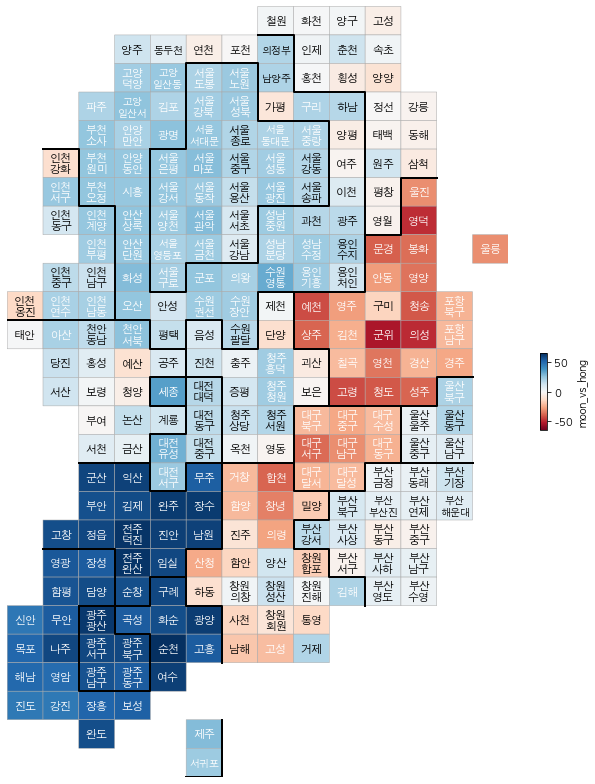

In [49]:
drawKorea('moon_vs_hong', final_elect_data, 'RdBu')

확실히 19대 대선은 푸른 물결이었네요! 경상쪽은 홍준표 후보가 강하지만, 부산과 함께 수도권 지역은 문재인 후보 지지율이 앞섰네요. 

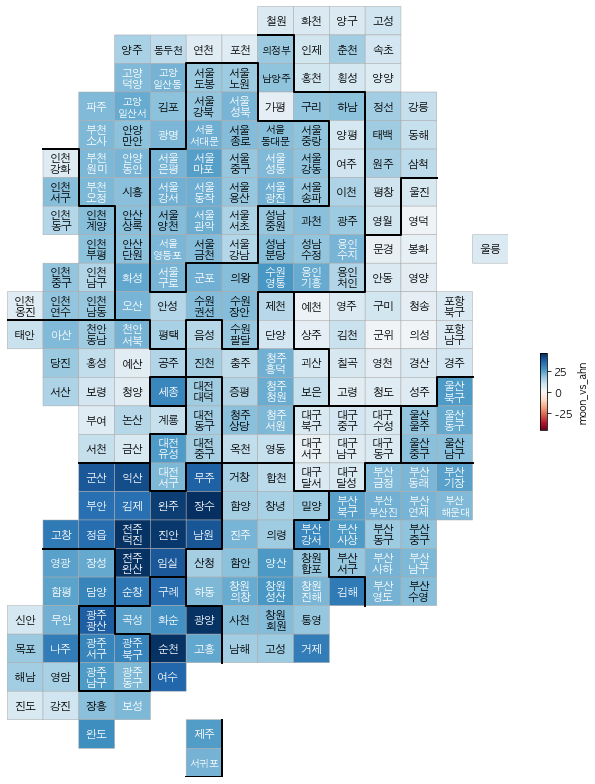

In [50]:
drawKorea('moon_vs_ahn', final_elect_data, 'RdBu')

문재인 후보와 안철수 후보를 비교해봅시다. 여기서는 단 한곳도 이긴 곳이 없다고 할 수 있네요. 지지층이 겹친 것 치고도 안철수 후보는 상당히 참패했어요.

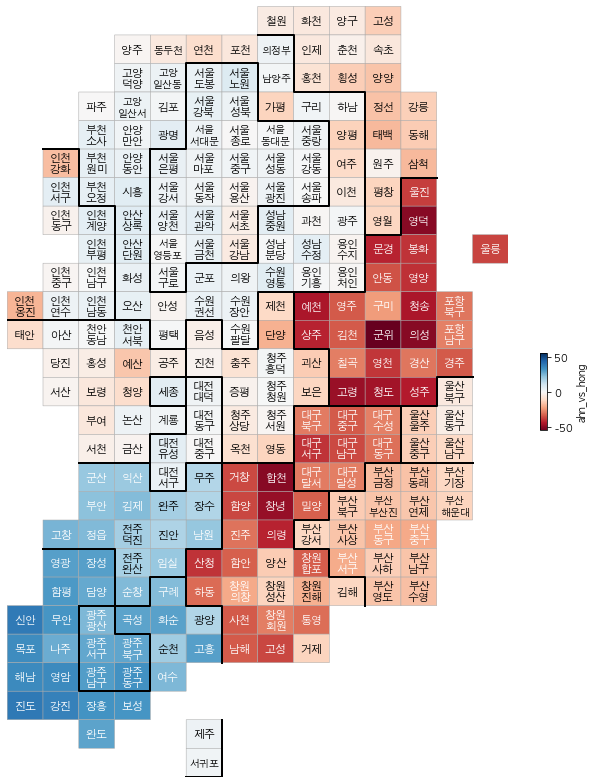

In [51]:
drawKorea('ahn_vs_hong', final_elect_data, 'RdBu')

오히려 홍준표와 안철수 후보가 박빙이었는데요, 그래도 홍준표 후보가 보수층 표가 다 몰렸다보니까 더 우세하긴 한 것 같습니다.

그러면 이제는 실제 지도 위에 Folium으로 시각화해보도록 하겠습니다. 필요한 모듈들을 임포트해주고요. 

In [52]:
import folium 
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ID를 기준으로 인덱스를 설정해준 다음에, 광역시도랑 시군은 필요없으니까 지우구요.

In [53]:
pop_folium = final_elect_data.set_index('ID')


del pop_folium['광역시도']
del pop_folium['시군']

pop_folium.head()

,pop,moon,hong,ahn,rate_moon,rate_hong,rate_ahn,y,x,moon_vs_hong,moon_vs_ahn,ahn_vs_hong
ID,,,,,,,,,,,,
서울 종로,102566.0,42512.0,22325.0,22313.0,41.448433,21.766472,21.754773,4,6,19.681961,19.693661,-0.011700
서울 중구,82852.0,34062.0,17901.0,19372.0,41.111862,21.605996,23.381451,5,6,19.505866,17.730411,1.775455
서울 용산,148157.0,58081.0,35230.0,32109.0,39.202333,23.778829,21.672280,6,6,15.423503,17.530053,-2.106549
서울 성동,203175.0,86686.0,40566.0,45674.0,42.665682,19.966039,22.480128,5,7,22.699643,20.185554,2.514089
서울 광진,240030.0,105512.0,46368.0,52824.0,43.957839,19.317585,22.007249,6,7,24.640253,21.950590,2.689664


In [54]:
geo_path = '05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=6)
map.choropleth(geo_data = geo_str, 
              data = pop_folium['moon_vs_hong'],
              columns = [pop_folium.index, pop_folium['moon_vs_hong']],
              fill_color = 'PuBu',
              key_on = 'feature.id')
map

요렇게 시각화하면 부산과 수도권 쪽에서 좀 더 짙은 파란색을 띠고 있다는 것을 알 수 있습니다. 조금 더 색을 다르게 표현할 수 있으면 좋을 것 같은데 좀 아쉽긴 하네요ㅎㅎ 

### 공부를 끝내며 
이번 주차 프로젝트는 그렇게 어렵지 않았죠? 계속해서 복습하면서 새로운 모듈들의 사용법에 익숙해지는 것 같습니다 :) 이것을 가지고 20대 총선을 분석해보아도 좋을 것 같아요. 그렇게 되려면 지도 ID를 지역구에 맞춰서 다시 짜보는 것이 필요하겠지요..ㅎㅎ 확실히 이번 주에는 공부하는데 더 여유가 있을 것 같네요. 그 동안 나만의 프로젝트를 한번 구상해보는 것도 좋을 것 같습니다😀 잘 생각해보고 계시죠?🥰 무조건 도전해서 열정을 가지고!!! 유노윤호처럼!!! 해보리라는 포부를 품고 나만의 프로젝트를 잘 준비하셨으면 좋겠습니다ㅎㅎ 화이팅💖